In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader ,random_split
classes = 3
num_epoch = 50
batch = 32
lr = 0.01


In [10]:
transform = transforms.Compose([ transforms.Resize((256, 256)), 
                                 transforms.RandomHorizontalFlip(p=0.5),
                                 transforms.RandomVerticalFlip(p=0.5),
                                 transforms.RandomRotation(20),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                  std=[0.5, 0.5, 0.5]) 
                               ])
Data = datasets.ImageFolder(root='/kaggle/input/petato-data/data', transform=transform)
print("Classes:", Data.classes)
All_classes = Data.classes
len(Data)

Classes: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


2152

54
7
7


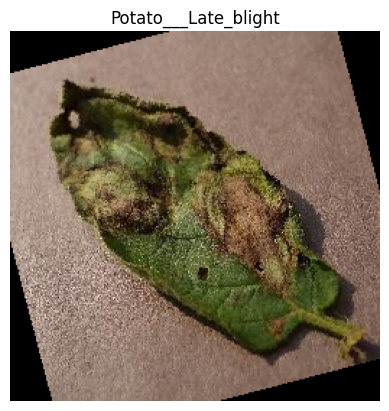

Train batch: torch.Size([32, 3, 256, 256]) torch.Size([32])


In [11]:
total_size = len(Data)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(Data, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset , batch_size=batch,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch, shuffle=False)
valid_loader = DataLoader(val_dataset, batch_size=batch, shuffle=False)

print(len(train_loader))
print(len(test_loader))
print(len(valid_loader))
for images, labels in train_loader:
    img = images[0]  # first image in batch
    # Convert from [C,H,W] to [H,W,C]
    img = img.permute(1, 2, 0)
    # Unnormalize from [-1,1] to [0,1]
    img = img * 0.5 + 0.5
    plt
    plt.imshow(img.numpy())
    plt.title(All_classes[labels[0]])
    plt.axis("off")
    plt.show()
    
    print("Train batch:", images.shape, labels.shape)
    break

In [12]:
from torchsummary import summary
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class CNNModele(nn.Module):
    def __init__(self, num_classes):
        super(CNNModele, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.conv5 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.relu6 = nn.ReLU()
        self.conv7 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.relu7 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 2 * 2, 128)  
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.relu1(self.conv1(x)) 
        out = self.pool(out)      
        out = self.relu2(self.conv2(out)) 
        out = self.pool(out)   
        out = self.relu3(self.conv3(out)) 
        out = self.pool(out) 
        out = self.relu4(self.conv4(out)) 
        out = self.pool(out) 
        out = self.relu5(self.conv5(out)) 
        out = self.pool(out)
        out = self.relu6(self.conv6(out)) 
        out = self.pool(out)
        out = self.relu7(self.conv7(out)) 
        out = self.pool(out)
        out = out.view(out.size(0), -1)  
        out = self.fc1(out)
        out = self.fc2(out)
        return out
model = CNNModele(num_classes=3).to(device)
summary(model, input_size=(3, 256, 256),device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             896
              ReLU-2         [-1, 32, 256, 256]               0
         MaxPool2d-3         [-1, 32, 128, 128]               0
            Conv2d-4         [-1, 64, 128, 128]          18,496
              ReLU-5         [-1, 64, 128, 128]               0
         MaxPool2d-6           [-1, 64, 64, 64]               0
            Conv2d-7           [-1, 64, 64, 64]          36,928
              ReLU-8           [-1, 64, 64, 64]               0
         MaxPool2d-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,928
             ReLU-11           [-1, 64, 32, 32]               0
        MaxPool2d-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,928
             ReLU-14           [-1, 64,

In [13]:
model = CNNModele(classes).to(device)
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
step_lr = torch.optim.lr_scheduler.StepLR(optimizer,step_size=5,gamma=0.1)

Epoch [1/50] Train Acc: 0.6723 | Val Acc: 0.8651
Epoch [2/50] Train Acc: 0.8210 | Val Acc: 0.8372
Epoch [3/50] Train Acc: 0.8309 | Val Acc: 0.8884
Epoch [4/50] Train Acc: 0.8234 | Val Acc: 0.9023
Epoch [5/50] Train Acc: 0.8518 | Val Acc: 0.7907
Epoch [6/50] Train Acc: 0.8623 | Val Acc: 0.9070
Epoch [7/50] Train Acc: 0.8780 | Val Acc: 0.9070
Epoch [8/50] Train Acc: 0.8826 | Val Acc: 0.9256
Epoch [9/50] Train Acc: 0.8809 | Val Acc: 0.9116
Epoch [10/50] Train Acc: 0.8844 | Val Acc: 0.9070
Epoch [11/50] Train Acc: 0.8896 | Val Acc: 0.9116
Epoch [12/50] Train Acc: 0.8896 | Val Acc: 0.9209
Epoch [13/50] Train Acc: 0.8908 | Val Acc: 0.9256
Epoch [14/50] Train Acc: 0.8896 | Val Acc: 0.9163
Epoch [15/50] Train Acc: 0.8942 | Val Acc: 0.9070
Epoch [16/50] Train Acc: 0.8960 | Val Acc: 0.9209
Epoch [17/50] Train Acc: 0.8942 | Val Acc: 0.9209
Epoch [18/50] Train Acc: 0.8925 | Val Acc: 0.9163
Epoch [19/50] Train Acc: 0.8937 | Val Acc: 0.9163
Epoch [20/50] Train Acc: 0.8902 | Val Acc: 0.9163
Epoch [21

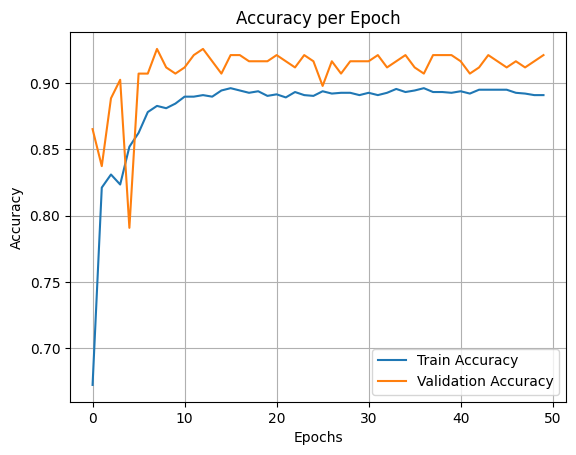

In [14]:
train = []
validation = []

for epoch in range(num_epoch):
    acc_train = 0
    acc_validation = 0
    for i , (image , label) in enumerate(train_loader):
        y_pred = model(image.to(device))
        label = label.to(device)
        acc_train += (torch.argmax(y_pred, dim=1) == label).sum().item()
        loss = Loss(y_pred,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    step_lr.step()
    train.append(acc_train/len(train_dataset))
    with torch.no_grad():
        for i , (image , label) in enumerate(valid_loader):
            y_pred = model(image.to(device))
            label = label.to(device)
            acc_validation += (torch.argmax(y_pred, dim=1) == label).sum().item()
        validation.append(acc_validation/len(val_dataset))
    print(f"Epoch [{epoch+1}/{num_epoch}] "
          f"Train Acc: {train[-1]:.4f} | Val Acc: {validation[-1]:.4f}")
    
plt.plot(range(num_epoch),train , label="Train Accuracy")
plt.plot(range(num_epoch),validation, label="Validation Accuracy")
plt.title("Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
        

# Note

We can stop training after 6 or 7 epochs


In [21]:
with torch.no_grad():
        acc_test = 0
        for i , (image , label) in enumerate(test_loader):
            y_pred = model(image.to(device))
            label = label.to(device)
            acc_test += (torch.argmax(y_pred, dim=1) == label).sum().item()
        print(acc_validation/len(test_dataset))

0.9166666666666666


In [ ]:
torch.save(model.state_dict(), "model.pth")